In [13]:
# ---- STEP 1 ----
# In the first step, we install the libraries we need to install

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [15]:
# ---- STEP 2 ----
# We used the number 42, which is the most popular number in the seeds. You can give any number you want.
np.random.seed(42)

# We made the number of customers 100
num_customers = 100

# My project start date is ‘2025-02-17’ = today.
today = pd.to_datetime("2025-02-17")

# We have determined subscription types and prices
payment_values = {
    'Basic':10,
    'Standard':20,
    'Premium':30}

In [17]:
# ---- STEP 3 ----

# Here we set the range of customer ids as one more than the customer id from 1.
# That's what we did to include the 100th customer.
# np.arange creates us to array 
customers_id = np.arange(1,num_customers +1 )

# We randomly assigned subscription types as many as the number of customers.

# np.random.choice type is = np.random.choice(array, size)
paymeny_type = np.random.choice(['Basic','Standard','Premium'],num_customers)

# We have created monthly payments
monthly_payment = np.array([payment_values[t] for t in paymeny_type])

# We have established the start date of memberships in 3-year periods.
# unit = ‘D’ = we asked it to show us in days
subscription_start = today - pd.to_timedelta(np.random.randint(1, 365 * 3, num_customers), unit='D')

# We have assigned the termination of memberships for 30 days and 2 years.
subscription_end = subscription_start + pd.to_timedelta(np.random.randint(30, 365 * 2, num_customers), unit='D')


In [19]:
# ---- STEP 4 ----

# We created our dataframe area.

df = pd.DataFrame({
    'Customer_ID' : customers_id,
    'Subscription_Type' : paymeny_type,
    'Monthly_Payment' : monthly_payment,
    'Subscription_Start' : subscription_start,
    'Subscription_End' : subscription_end
    })


In [21]:
# ---- STEP 5 ----

# The reason why we add print (‘-------------_ _ _ _ _ _----------’ ) in between is to avoid confusing the data.

print ("-------------df.head----------" )
# We asked it to show the first 5 row
print(df.head()) 

print ("-------------df.info----------" )
# We asked it to give general information of the data set
print (df.info())

print ("-------------df.describe----------" )
# We asked it to show summary statistics of numeric columns
print (df.describe())

-------------df.head----------
   Customer_ID Subscription_Type  Monthly_Payment Subscription_Start  \
0            1           Premium               30         2023-05-11   
1            2             Basic               10         2022-02-26   
2            3           Premium               30         2023-07-05   
3            4           Premium               30         2024-01-22   
4            5             Basic               10         2023-12-26   

  Subscription_End  
0       2024-05-12  
1       2023-12-28  
2       2024-11-18  
3       2024-07-20  
4       2025-03-14  
-------------df.info----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer_ID         100 non-null    int32         
 1   Subscription_Type   100 non-null    object        
 2   Monthly_Payment     100 non-null    int32      

In [23]:
# ---- STEP 6 ----

# In this step we want to see the average subscription times. 
# Thus, we can progress our first analysis graph over this.

print ("-------------Average Duration----------" )

df['Subscription_Duration'] = (df['Subscription_End'] - df['Subscription_Start']).dt.days
average_duration = df['Subscription_Duration'].mean() # averaged with mean
print(f"Average subscription period: {average_duration:.2f} day")

# For example, my answer is : Average subscription period: 364.58 day

-------------Average Duration----------
Average subscription period: 364.58 day


-------------Graphic 1(HISTOGRAM)----------


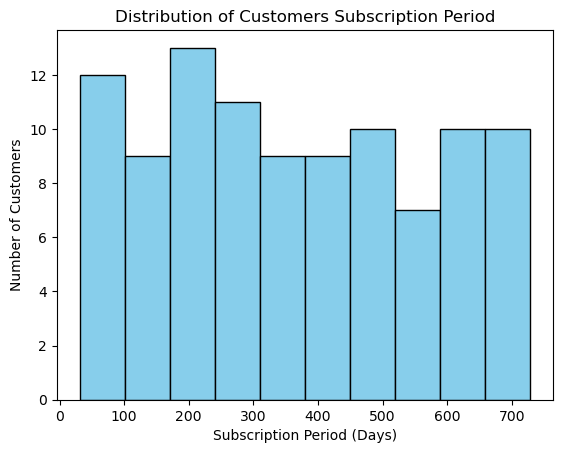

In [25]:
# ---- STEP 7 ----

print ("-------------Graphic 1(HISTOGRAM)----------" )
plt.figure()
plt.hist(df['Subscription_Duration'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Subscription Period (Days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Subscription Period')
plt.show()


In [27]:
# ---- STEP 8 ----

# In this step we will analyse the average subscription periods

print ("-------------Average Payment----------" )

df['Total_Payment'] = (df['Monthly_Payment'] * df['Subscription_Duration'] / 30)
average_payment = df['Total_Payment'].sum()
print(f"Average payment: {average_payment:.2f} $" )

# For example, my answer is : Average payment: 24965.00 $

-------------Average Payment----------
Average payment: 24965.00 $


In [29]:
# ---- STEP 9 ----

# This step shows us which type of membership is preferred the most.

print ("-------------Popular Subscription Type Value----------" )

subscription_type_value = (df.groupby('Subscription_Type')['Total_Payment'].sum())
most_popular_type = subscription_type_value.idxmax()
print(f"Most popular subscription type: {most_popular_type}")

# For example, my answer is : Most popular subscription type: Premium

-------------Popular Subscription Type Value----------
Most popular subscription type: Premium


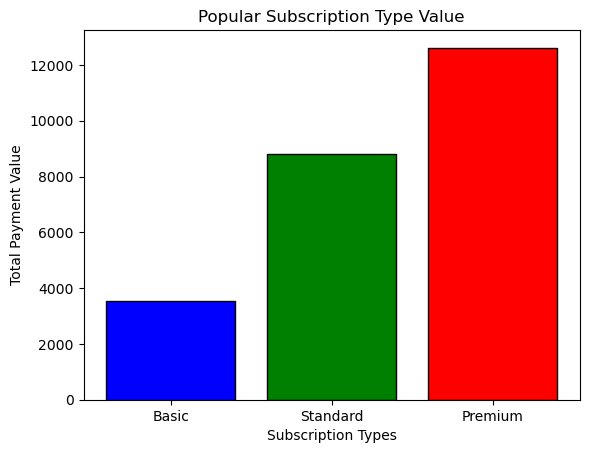

In [31]:
# ---- STEP 10 ----

# In our second graphic step, we made the BAR graph.
# In this chart we will analyse the values of popular subscription types

# We have listed the types of membership with order
order = ['Basic', 'Standard', 'Premium']

subscription_type_value_graph = df.groupby('Subscription_Type')['Total_Payment'].sum().reindex(order)

plt.figure()
plt.bar(subscription_type_value_graph.index, subscription_type_value_graph.values, color=['blue', 'green', 'red'],edgecolor='black')
plt.xlabel('Subscription Types') # basic, standart, premium
plt.ylabel('Total Payment Value')
plt.title('Popular Subscription Type Value')
plt.show()

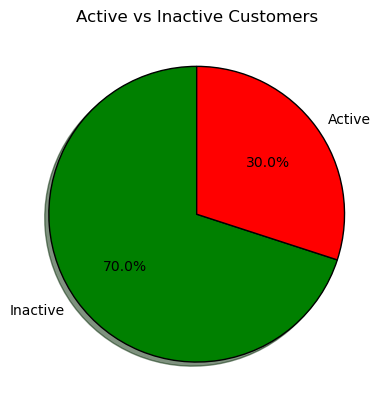

In [33]:
# ---- STEP 11 ----

# In our thirt graphic step, we made the PIE graph.

plt.figure()

df['Customer_Status'] = np.where(df['Subscription_End'] >= today , 'Active', 'Inactive')

customer_counts = df['Customer_Status'].value_counts() 

plt.pie(
    customer_counts.values,  # Number of customers
    labels=customer_counts.index,  # ‘Active’ and ‘Inactive’ tags
    autopct='%1.1f%%',  # Percentage display

    # Use of  autopct=‘%1.1f%%’:

    # ‘%1.0f%%%’ → Integer (70%)
    # ‘%1.1f%%%’ → 1 decimal place (70.0%)
    # ‘%1.2f%%%’ → 2 decimal places (70.00%)
    
    colors=['green', 'red'],  # Green: Active, Red: Inactive
    startangle=90,  # Starting angle
    wedgeprops={'edgecolor': 'black'},  # Add border
    shadow = True
)

plt.title('Active vs Inactive Customers')  # Title
plt.show()

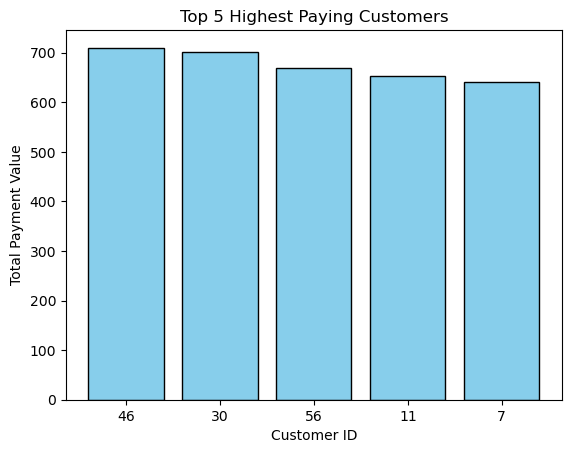

In [35]:
# ---- STEP 12 ----

# In our fourth graphic step, we made the BAR graph.
#In the last step, we asked him to show the top 5 paying customers.


# Here we get the top 5 rows with head(5).
# sort_values() allows us to sort the values in a specified column from lower to higher or from higher to lower.
# df.sort_values(by=‘Total_Payment’, ascending=False) The reason we use this is that we want to see the ‘top payers’ at the top.
# ascending=False is used to sort from higher to lower order.

top5_customers = df.sort_values(by='Total_Payment', ascending=False).head(5)

plt.figure()

plt.bar(top5_customers['Customer_ID'].astype(str), top5_customers['Total_Payment'], color='skyblue',edgecolor='black')  

"""
1 - plt.bar(x, y, colour=‘skyblue’) What does it do?

*This command draws a bar chart using the matplotlib library:

*x: Determines which categories the bars represent (Customer IDs).
**y: Height of the bars (Payment values).
***colour=‘skyblue’: The colour of the bars will be skyblue.

2 - top5_customers[‘Customer_ID’].astype(str) Why Used?

* Customer_ID is probably in number format (int or float).
** The plt.bar() function requires the category names (Customer IDs) to be in string (str) format to display them as text on the x-axis.
***So we convert Customer_IDs to text format using astype(str).

#If we don't use astype(str), matplotlib may recognise these numbers as continuous x-axis and give an error.
#But when we use astype(str), they are treated as categorical values.

3 - What Does top5_customers[‘Total_Payment’] Do?
*Determines the height of the bars on the Y axis.
**Shows how much you paid for each customer.
"""

plt.xlabel('Customer ID') 
plt.ylabel('Total Payment Value')
plt.title('Top 5 Highest Paying Customers')
plt.show()
